In [246]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import collections

In [247]:
# Question 1:

In [248]:
# 1a
def createErdosRenyiGraph(n, p):
    G = nx.Graph()
    for i in range(1, n+1):
        G.add_node(i)
        for j in range(i+1, n+1):
            if random.uniform(0, 1) < p:
                G.add_edge(i, j)
    nx.draw(G, with_labels = True)
    plt.show()
    return G

In [249]:
# 1b
def nodeClusteringCoefficient(G, node,degree):
    value=degree*(degree-1)
    if value==0:
        return 0
    counter=0
    for n1 in G.neighbors(node):
        for n2 in G.neighbors(node):
            if G.has_edge(n1,n2):
                counter+=1
    
    result =counter/value
    return result

def computeClusteringCoefficient(G):
    degrees = [val for (node, val) in G.degree()]
    result =0
    i=0
    for node in G.nodes():
        result +=nodeClusteringCoefficient(G, node,degrees[i])
        i+=1
        
    result= result/len(G)
    return result


In [250]:
# 1c
def gather_statistics(n,p):
    G =createErdosRenyiGraph(n, p)

    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks(deg)
    ax.set_xticklabels(deg)
    plt.show()
    
    result =computeClusteringCoefficient(G)
    print("The result of the Clustering Coefficient is :",result)
    
    result =nx.diameter(G)
    print("The result of the diameter is :",result)


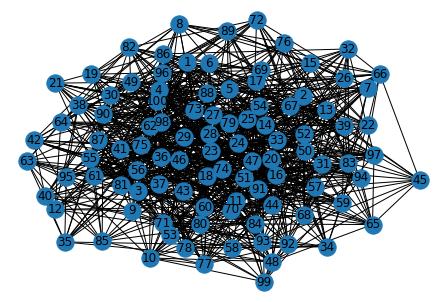

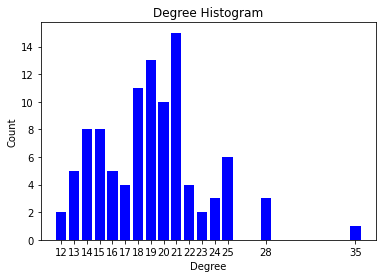

The result of the Clustering Coefficient is : 0.18458267099158193
The result of the diameter is : 3


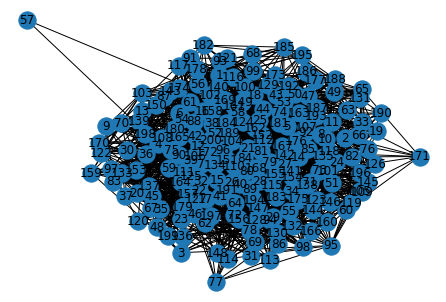

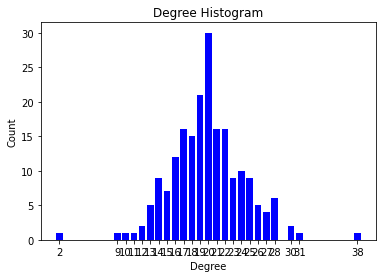

The result of the Clustering Coefficient is : 0.09720446555482702
The result of the diameter is : 4


In [251]:
gather_statistics(100,0.2)
gather_statistics(200,0.1)

In [252]:
# Question 2:

In [253]:
import warnings
import networkx as nx
import matplotlib.pyplot as plt
import random
warnings.filterwarnings('ignore')

In [254]:
def Our_Degree_centrality(G):
    i=0
    amount_of_vertex= len(G)-1
    degrees = [val for (node, val) in G.degree()]
    
    for vertex in G.nodes():
        degrees[i]=degrees[i]/amount_of_vertex
        i+=1
    return degrees

In [255]:
def Our_Closness_centrality(G):
    path = dict(nx.all_pairs_shortest_path_length(G))
    vertex_shortest_path=[]
    i=0
    res=0
    num_vertex =len(G)
    amount_of_vertex= len(G)-1
    for key, value in path.items():
        for key1,val1 in value.items():
            if i== num_vertex-1:
                res+=val1
                res =(1/res)* (num_vertex-1)
                vertex_shortest_path.append(res) 
                i=0
                res=0
            else:
                res+=val1
                i+=1
    return vertex_shortest_path

In [256]:
   def Our_Betweenness_Centrality_Node(G, node):
    n = G.number_of_nodes()
    res = 0.0
    normal = 2/((n-1)*(n-2))
    for start in list(G.nodes()):
        for end in list(G.nodes()):
            cnt = 0
            if ((start < end) and (start != node) and (end != node)):
                lst = list((nx.all_shortest_paths(G, start, end)))
                total = len(lst)
                for path in lst:
                    if node in path:
                        cnt += 1
                res += cnt/total
    return res*normal
    

In [257]:
 def Our_Betweenness_centrality(G):
    between=[]
    res=0.0
    for node in G.nodes():
        res= Our_Betweenness_Centrality_Node(G, node)
        between.append(res)
    return between

In [258]:
def gather_info_visualizen():
    G=nx.erdos_renyi_graph(25,0.4)
    closness=Our_Closness_centrality(G)
    degree=Our_Degree_centrality(G)
    betweenness =Our_Betweenness_centrality(G)
    index_list1=sorted( [(x,i) for (i,x) in enumerate(closness)], reverse=True )[:5]
    size=[]
    for item in closness:
        size.append(item*2000)
        
    closness=[]
    
    print("Clossness top 5 vertex: ")
    for val,index in index_list1:
        print("The vertex is:",index," ","The value is: ",val)
        closness.append(index)
    
    index_list2=sorted( [(x,i) for (i,x) in enumerate(degree)], reverse=True )[:5]
    print("Degree top 5 vertex: ")
    for val,index in index_list2:
        print("The vertex is:",index," ","The value is: ",val)
    
    index_list3=sorted( [(x,i) for (i,x) in enumerate(betweenness)], reverse=True )[:5]
    print("Betweenness top 5 vertex: ")
    for val,index in index_list3:
        print("The vertex is:",index," ","The value is: ",val)
        
    Cd = nx.degree_centrality(G)
    Cb = nx.betweenness_centrality(G)
    Cc = nx.closeness_centrality(G)

        
    print("-------------------Closeness Visualize----------------------")   
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue")
    plt.show()
    
    size=[]
    for item in degree:
        size.append(item*2000)
        
    print("-------------------Degree Visualize----------------------")   
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue")
    plt.show()
    
   
    
    size=[]
    for item in betweenness:
        size.append(item*20000)
    print("-------------------Betweenness Visualize----------------------")   
    nx.draw(G, with_labels=True, node_size=size, node_color="skyblue")
    plt.show()
    
    

Clossness top 5 vertex: 
The vertex is: 15   The value is:  0.7058823529411764
The vertex is: 9   The value is:  0.6666666666666666
The vertex is: 7   The value is:  0.6486486486486487
The vertex is: 2   The value is:  0.6486486486486487
The vertex is: 0   The value is:  0.6486486486486487
Degree top 5 vertex: 
The vertex is: 15   The value is:  0.5833333333333334
The vertex is: 9   The value is:  0.5
The vertex is: 7   The value is:  0.4583333333333333
The vertex is: 2   The value is:  0.4583333333333333
The vertex is: 0   The value is:  0.4583333333333333
Betweenness top 5 vertex: 
The vertex is: 15   The value is:  0.08017098906687006
The vertex is: 9   The value is:  0.05636237332461589
The vertex is: 21   The value is:  0.044372934146961605
The vertex is: 0   The value is:  0.04380357596890779
The vertex is: 7   The value is:  0.041508889978569614
-------------------Closeness Visualize----------------------


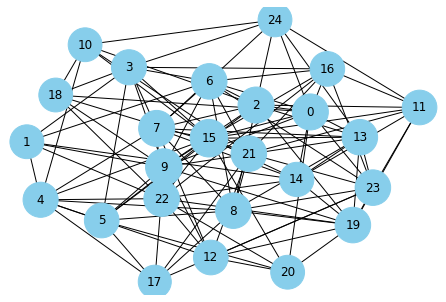

-------------------Degree Visualize----------------------


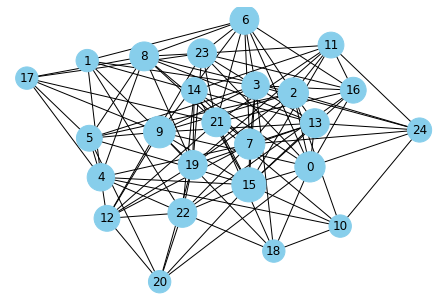

-------------------Betweenness Visualize----------------------


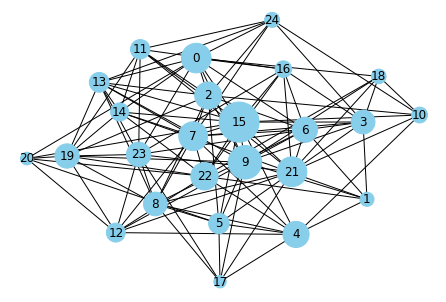

In [259]:
gather_info_visualizen()

In [260]:
# Question 3:

In [261]:
def createAssignErdosRenyiGraph(n, p, possitive_edges_prob):
    G = nx.Graph()
    for i in range(1, n+1):
        G.add_node(i)
        for j in range(i+1, n+1):
            if random.uniform(0, 1) < p:
                if random.uniform(0,1) < possitive_edges_prob:
                    G.add_edge(i, j, label='+')
                else:
                    G.add_edge(i, j, label='-')              
    return G

In [262]:
def displayGraph(G):
        
    positive_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+']
    negative_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-']
    
    pos = nx.circular_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G,pos,node_size=100, node_color='orange')

    # Draw edges
    nx.draw_networkx_edges(G,pos,edgelist=positive_egdes, width=2, edge_color='g')
    nx.draw_networkx_edges(G,pos,edgelist=negative_egdes, width=3, alpha=0.5,edge_color='b', arrows=False,style='dashed')

    # Draw node labels
    nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

    # Draw edge labels
    edge_labels =dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show() # display

In [279]:
def checkBalance(G):
    
    print("The input graph:")
    displayGraph(G)
    
    #list the positive egdes and negative egdes
    positive_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+']
    negative_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-']
    
    #Build a positive edges graph
    positive_graph = nx.Graph()
    positive_graph.add_edges_from(positive_egdes)
    
    #Add isolated nodes (nodes with negative edges only in the original graph)
    for node in G.nodes():
        if node not in positive_graph.nodes():
            positive_graph.add_node(node)
    
    #find connected components
    positive_components = [x for x in sorted(nx.connected_components(positive_graph), key=len, reverse=True)]
    super_graph = nx.empty_graph(len(positive_components))
    #print(positive_components)
    
    #Connect components A and B if there is a negative edge between the members
    for edge in negative_egdes:
        for i in range (0, len(positive_components)):
            if edge[0] in positive_components[i]:
                comp_A = i
            if edge[1] in positive_components[i]:
                comp_B = i
        if comp_A == comp_B:
            print("Graph is unbalance, Graph contains negative edge that belong to positive connected component:", edge)
            return False
        super_graph.add_edge(comp_A, comp_B , label = "-")
    
    
    # Check if the super Graph is Bipartite graph if and only if it contains no cycle with an odd number of negative edges
    for cycle in nx.cycle_basis(super_graph):
        if (len(cycle) % 2 == 1):
            print("Graph is unbalance, Graph contains cycle with an odd number of negative edges")
            return False
    
    print("Graph is balance")
    #print("Super graph: ")
    #displayGraph(super_graph)
    
    return True

The input graph:


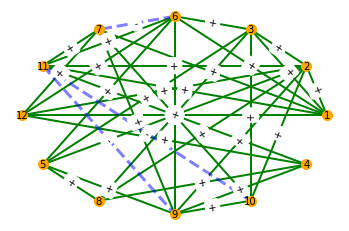

Graph is unbalance, Graph contains negative edge that belong to positive connected component: (6, 7)


False

In [286]:
G1 = createAssignErdosRenyiGraph(12,0.6,0.95)
checkBalance(G1)

The input graph:


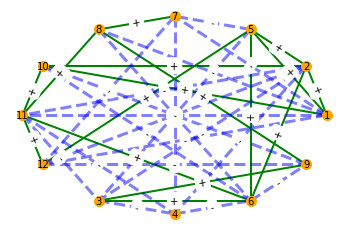

Graph is unbalance, Graph contains negative edge that belong to positive connected component: (1, 7)


False

In [287]:
G2 = createAssignErdosRenyiGraph(12,0.6,0.5)
checkBalance(G2)

The input graph:


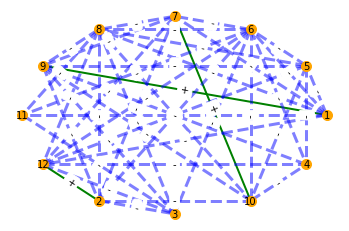

Graph is unbalance, Graph contains cycle with an odd number of negative edges


False

In [288]:
G3 = createAssignErdosRenyiGraph(12,0.6,0.05)
checkBalance(G3)